In [2]:
from zipfile import ZipFile

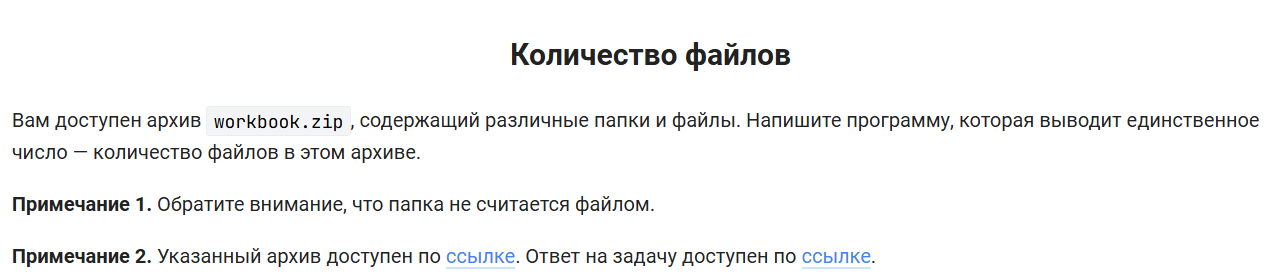

In [3]:
#Проверка является ли объект папкой или файлов
counter = 0
with ZipFile('workbook.zip') as zip_file:
    info = zip_file.infolist()
    for f in info:
        if(not(f.is_dir())):
            counter += 1
print(counter)

18


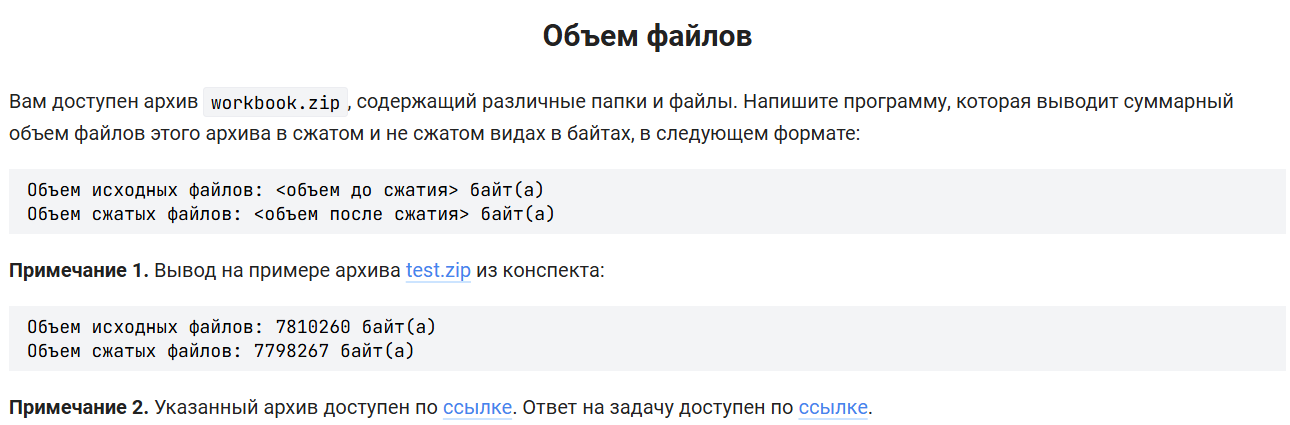

In [4]:
with ZipFile(r'workbook.zip') as zip_file:
    infolist = zip_file.infolist()
    zip_size = sum([f.compress_size for f in infolist])
    real_size = sum([f.file_size for f in infolist])
print(f'Объем исходных файлов: {real_size} байт(а)')
print(f'Объем сжатых файлов: {zip_size} байт(а)')

Объем исходных файлов: 17118701 байт(а)
Объем сжатых файлов: 15693720 байт(а)


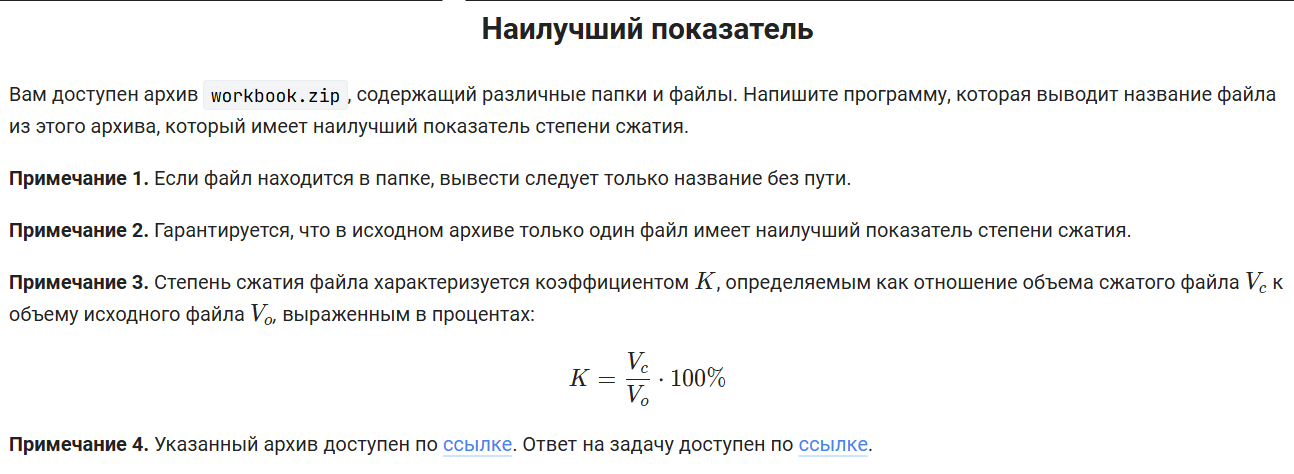

In [5]:
with ZipFile(r'workbook.zip') as zip_file:
    infolist = zip_file.infolist()
    zip_size = sum([f.compress_size for f in infolist])
    real_size = sum([f.file_size for f in infolist])
    sizes = [(inf.compress_size/inf.file_size,inf.filename) for inf in infolist if not(inf.is_dir())]
    sorted_sizes = sorted(sizes,key= lambda size: size[0])
min_name = sorted_sizes[0][1].split('/')[-1::][0]
min_name

'fontlist-v330.json'

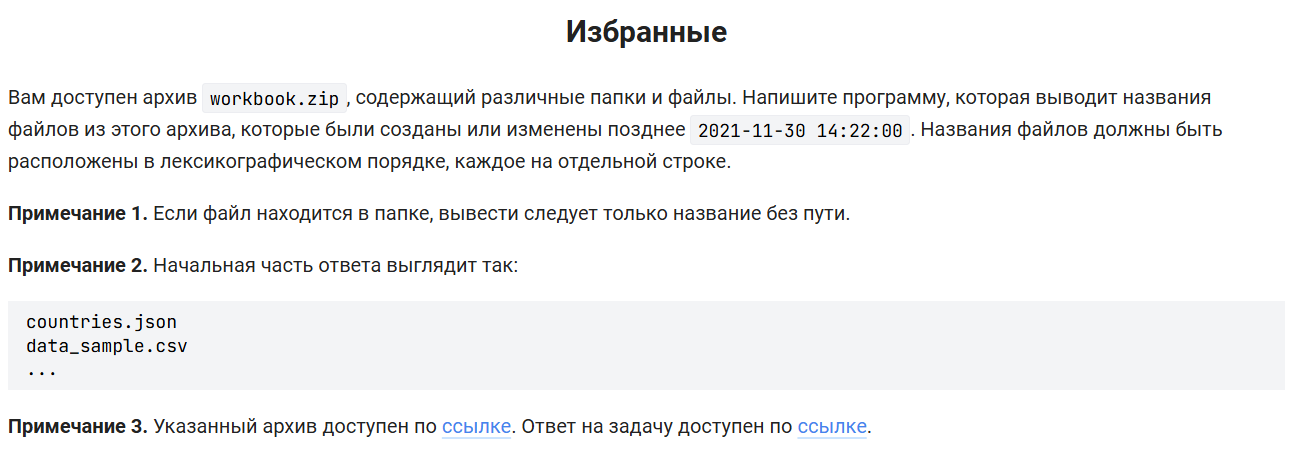

In [14]:
with ZipFile('workbook.zip') as zip_file:
    my_date = (2021, 11, 30, 14, 22, 00)
    infolist = zip_file.infolist()
    dates_names = [(f.date_time,f.filename.split('/')[-1::][0]) for f in infolist if not(f.is_dir()) and f.date_time > my_date]
    sorted_dates_names = sorted(dates_names,key= lambda x: x[1])
    names = [print(name[1]) for name in sorted_dates_names]

countries.json
data_sample.csv
earth.jpg
exam.txt
fipi_demo_2022.pdf
homework.py
python.pdf
readme.txt
shopping_list.txt
task_results.xlsx


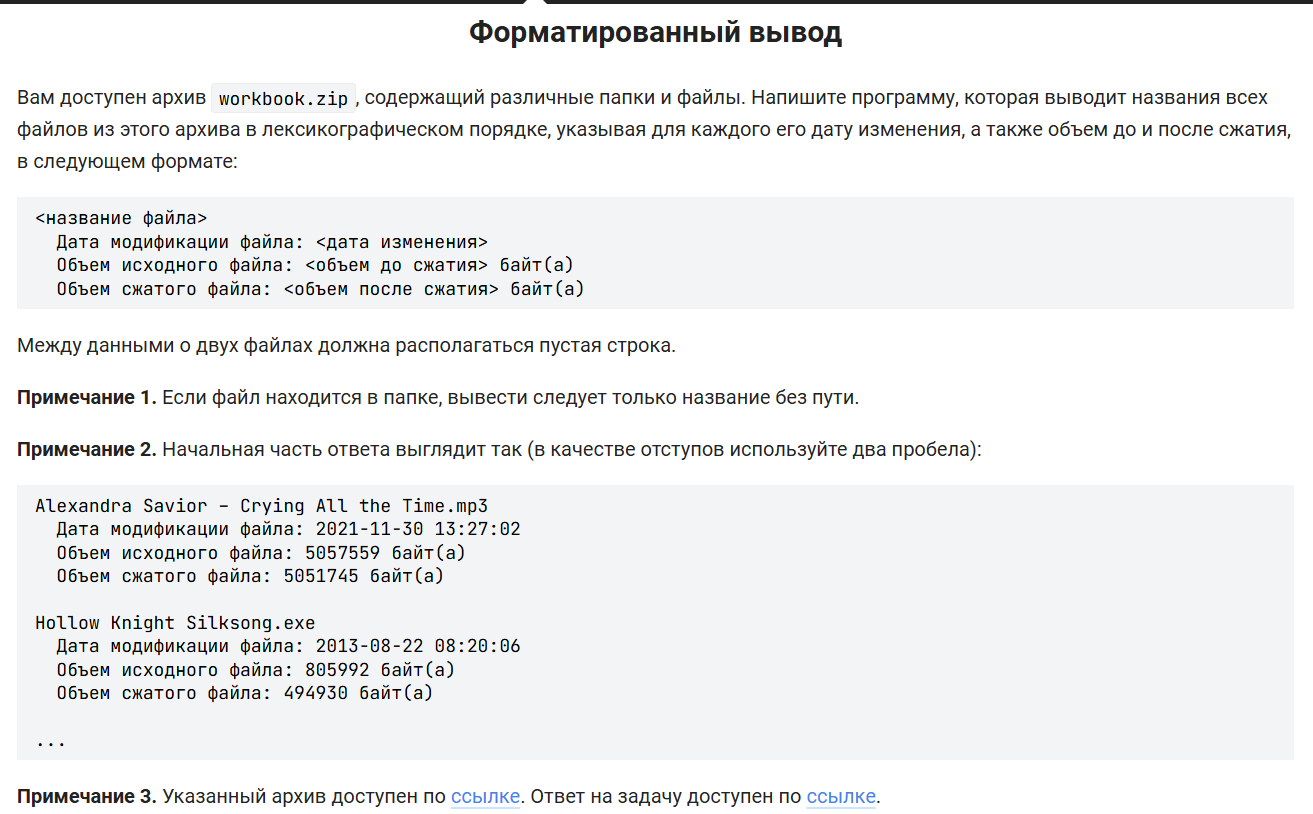

In [36]:
from datetime import datetime
with ZipFile('workbook.zip') as zip_file:
    infolist = zip_file.infolist()
    file_lst = [(inf.date_time,inf.compress_size,inf.file_size,inf.filename.split('/')[-1::][0]) for inf in infolist if not(inf.is_dir())]
    sort_file_lst = sorted(file_lst,key=lambda x: x[3])
    [print(f'{file[3]}\n  Дата модификации файла: {datetime(file[0][0],file[0][1],file[0][2],file[0][3],file[0][4],file[0][5])}\n  Объем исходного файла: {file[2]} байт(а)\n  Объем сжатого файла: {file[1]} байт(а)\n') for file in sort_file_lst]
    

Alexandra Savior – Crying All the Time.mp3
  Дата модификации файла: 2021-11-30 13:27:02
  Объем исходного файла: 5057559 байт(а)
  Объем сжатого файла: 5051745 байт(а)

Hollow Knight Silksong.exe
  Дата модификации файла: 2013-08-22 08:20:06
  Объем исходного файла: 805992 байт(а)
  Объем сжатого файла: 494930 байт(а)

Psychonauts 2.exe
  Дата модификации файла: 2013-08-22 08:20:06
  Объем исходного файла: 805992 байт(а)
  Объем сжатого файла: 494930 байт(а)

code.jpeg
  Дата модификации файла: 2021-11-30 13:18:26
  Объем исходного файла: 412414 байт(а)
  Объем сжатого файла: 410006 байт(а)

countries.json
  Дата модификации файла: 2021-11-30 19:42:40
  Объем исходного файла: 22 байт(а)
  Объем сжатого файла: 22 байт(а)

data_sample.csv
  Дата модификации файла: 2021-11-30 19:41:58
  Объем исходного файла: 15 байт(а)
  Объем сжатого файла: 15 байт(а)

earth.jpg
  Дата модификации файла: 2021-11-30 20:15:26
  Объем исходного файла: 335250 байт(а)
  Объем сжатого файла: 330037 байт(а)



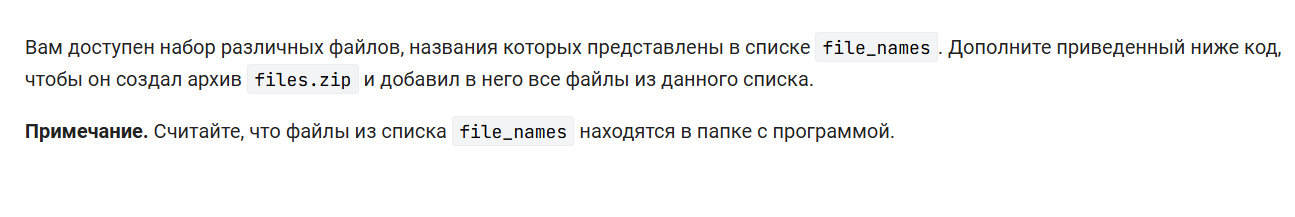

In [37]:
from zipfile import ZipFile

file_names = ['how to prove.pdf', 'fipi_demo_2022.pdf', 'Hollow Knight Silksong.exe',
              'code.jpeg', 'stepik.png', 'readme.txt', 'shopping_list.txt',
              'Alexandra Savior – Crying All the Time.mp3', 'homework.py', 'test.py']
#Создание архива и перенос в него файлов
with ZipFile('files.zip',mode='w') as zip_file:
    [zip_file.write(file) for file in file_names]

FileNotFoundError: [WinError 2] Не удается найти указанный файл: 'how to prove.pdf'

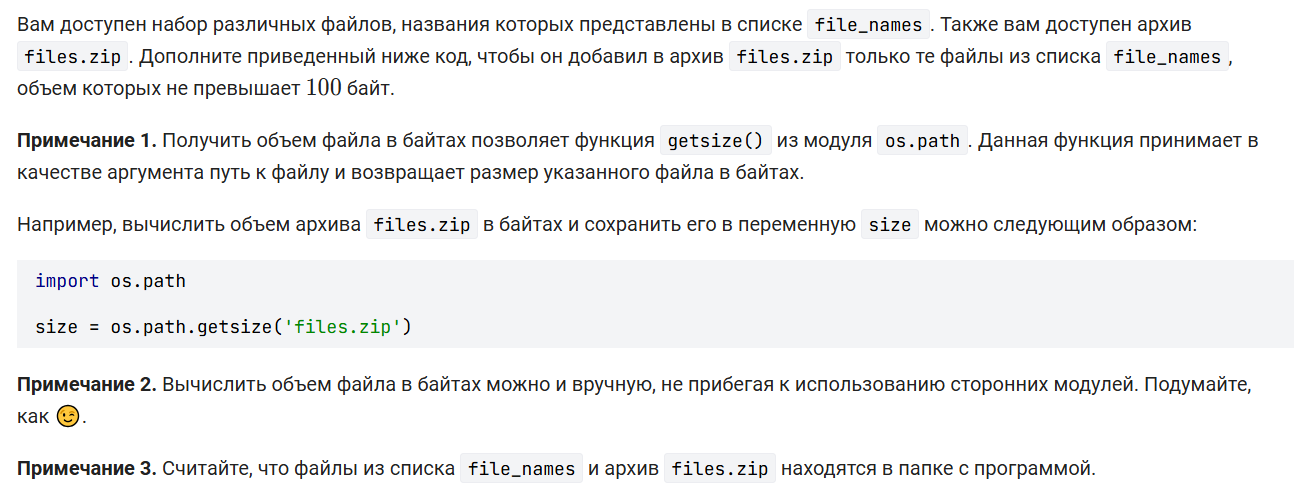

In [ ]:
from zipfile import ZipFile
import os.path

file_names = ['how to prove.pdf', 'fipi_demo_2022.pdf', 'Hollow Knight Silksong.exe',
              'code.jpeg', 'stepik.png', 'readme.txt', 'shopping_list.txt',
              'Alexandra Savior – Crying All the Time.mp3', 'homework.py', 'test.py']

with ZipFile('files.zip',mode='a') as zip_file:
    for file_name in file_names:
        size = os.path.getsize(file_name)
        #Если меньше 100 байт
        if(size <= 100):
            zip_file.write(file_name)
        

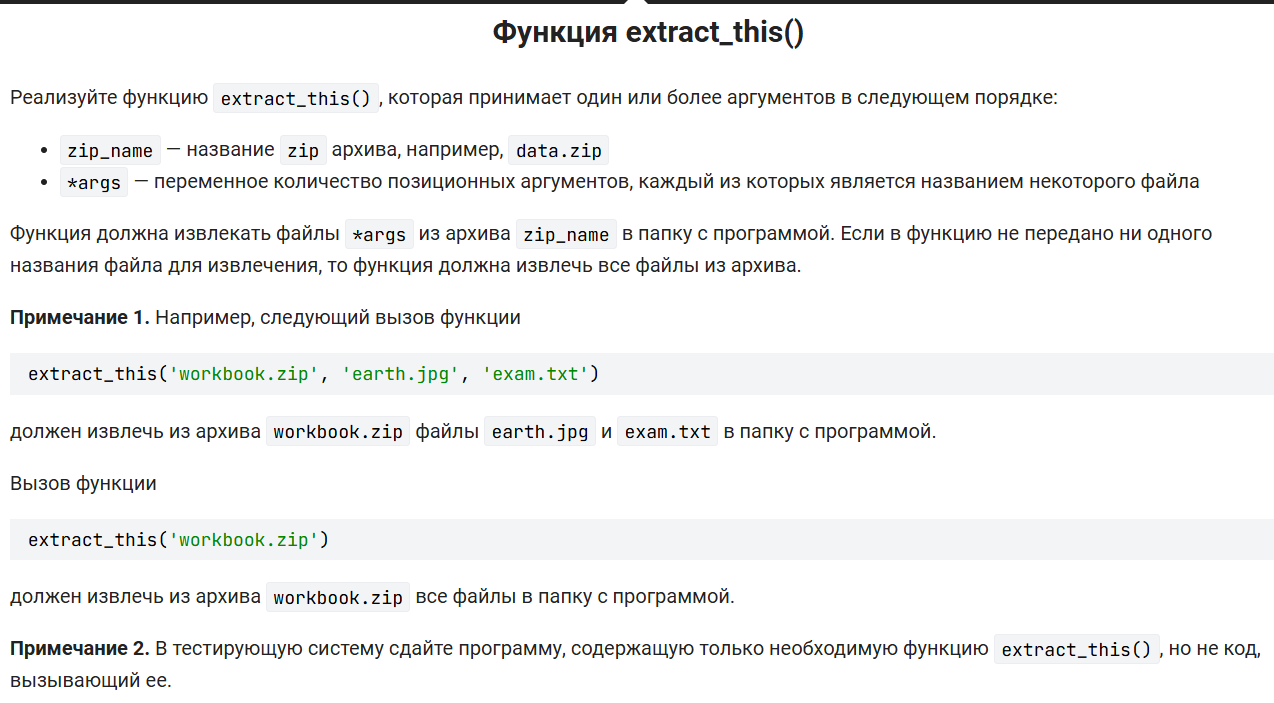

In [46]:
zip_name = 'workbook.zip'
file_names = ['how to prove.pdf']

#Извлечение отдельного файла

def extract_this(zip_name,*file_names):
    with ZipFile(zip_name) as zip_file:
        if(len(file_names) >= 1):
            for name in file_names:
                infolist = zip_file.infolist()
                file_name = [inf.filename for inf in infolist if name in inf.filename][0]
                zip_file.extract(file_name)
        else:
            zip_file.extractall()
extract_this('workbook.zip', 'earth.jpg', 'exam.txt')


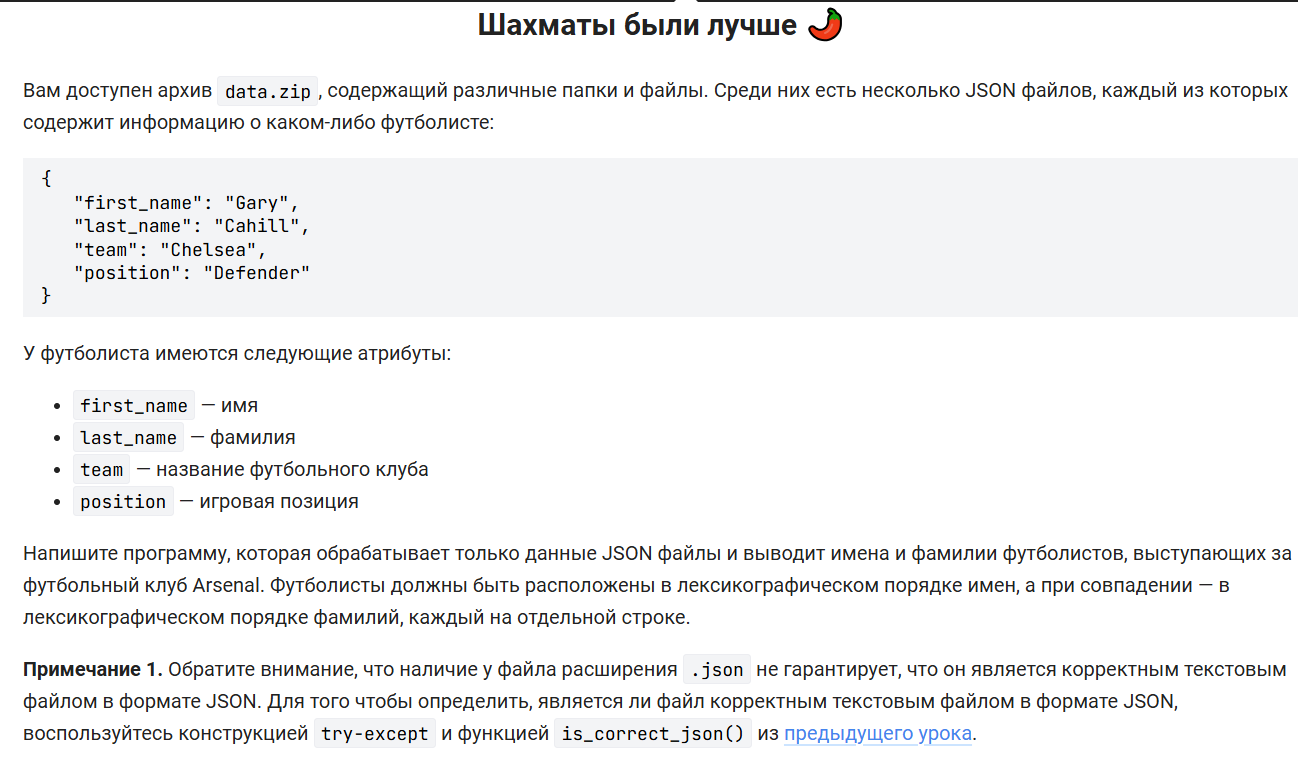

In [79]:
import json
def is_correct_json(string):
    try:
        json_data = json.loads(string)
    except:
        return False
    return True


zip_name = 'data.zip'
players_data = []
with ZipFile(zip_name) as zip_file:
    dir_name = zip_name.split('.')[0]

    infolist = zip_file.infolist()
    potential_json_lst = [file for file in infolist if not(file.is_dir()) and file.filename.endswith('.json')]
    for fileinfo in potential_json_lst:
        name = fileinfo.filename
        with zip_file.open(f'{name}') as file:
            try:
                data = file.read().decode('utf-8')
                if(is_correct_json(data)):
                    player = json.loads(data)
                    if(player['team'] == 'Arsenal'):
                        players_data.append((player['first_name'],player['last_name']))
            except:
                continue
sorted_players = sorted(players_data,key= lambda player: (player[0],player[1]))
for player in sorted_players:
    print(f'{player[0]} {player[1]}')

Alex Iwobi
Alexis Sanchez
Hector Bellerin
Laurent Koscielny
Mesut Ozil
Olivier Giroud
Petr Cech
Theo Walcott


In [92]:
import zipfile

# Форматируем размер: B, KB, MB, GB с округлением
def format_size(size):
    if size >= 1024 ** 3:
        return f"{round(size / 1024 ** 3)} GB"
    elif size >= 1024 ** 2:
        return f"{round(size / 1024 ** 2)} MB"
    elif size >= 1024:
        return f"{round(size / 1024)} KB"
    else:
        return f"{size} B"

# Добавляем путь в дерево — как папки, так и файлы
def add_to_tree(tree, parts, size=None):
    current = tree
    for i, part in enumerate(parts):
        if i == len(parts) - 1:
            if size is not None:
                current[part] = size  # файл
            else:
                current.setdefault(part, {})  # пустая папка
        else:
            current = current.setdefault(part, {})

# Рекурсивный вывод дерева со строго лексикологическим порядком
def print_tree(tree, indent=0):
    prefix = '  ' * indent

    # Сначала — папки (dict), потом — файлы (int), всё сортируется
    folders = sorted([k for k in tree if isinstance(tree[k], dict)])
    files = sorted([k for k in tree if isinstance(tree[k], int)])

    for folder in folders:
        print(f"{prefix}{folder}")
        print_tree(tree[folder], indent + 1)

    for filename in files:
        size_str = format_size(tree[filename])
        print(f"{prefix}{filename} {size_str}")

# Основной блок
tree = {}

with zipfile.ZipFile('desktop.zip') as archive:
    for item in archive.infolist():
        path = item.filename.strip('/')
        parts = path.split('/')

        if item.is_dir():
            add_to_tree(tree, parts)  # Добавим папку
        else:
            add_to_tree(tree, parts, item.file_size)  # Добавим файл

# Выводим финальную структуру
print_tree(tree)

fun
  movies
  songs
    Alexandra Savior Crying All the Time.mp3 5 MB
games
  not released
    Hollow Knight Silksong.exe 787 KB
  Psychonauts 2.exe 787 KB
images
  code.jpeg 403 KB
  stepik.png 11 KB
studying
  books
    how to prove.pdf 645 KB
  data_sets
    fonts
      fontlist-v330.json 94 KB
    countries.json 22 B
    data_sample.csv 15 B
    readme.txt 14 B
    task_results.xlsx 13 KB
  exam.txt 9 B
  fipi_demo_2022.pdf 666 KB
  homework.py 14 B
earth.jpg 327 KB
python.pdf 8 MB
shopping_list.txt 25 B
test.py 42 B


In [100]:
import zipfile

# Форматирует размер файла в B/KB/MB/GB (с округлением)
def format_size(size):
    if size >= 1024 ** 3:
        return f"{round(size / 1024**3)} GB"
    elif size >= 1024 ** 2:
        return f"{round(size / 1024**2)} MB"
    elif size >= 1024:
        return f"{round(size / 1024)} KB"
    else:
        return f"{size} B"

# Добавляем путь (список частей) в дерево
def add_to_tree(tree, parts, size=None):
    current = tree
    for i, part in enumerate(parts):
        if i == len(parts) - 1:
            # последний элемент — либо файл с размером, либо папка
            if size is not None:
                current.append((part, size))  # файл
            else:
                # убеждаемся, что папка присутствует, даже если пустая
                if not any(name == part and isinstance(child, tuple) and isinstance(child[1], list) for name, child in current):
                    current.append((part, []))  # папка без содержимого
        else:
            # ищем существующую папку на этом уровне
            for idx, (name, child) in enumerate(current):
                if name == part and isinstance(child, list):
                    current = child
                    break
            else:
                # если не нашли — создаём новую папку
                new_folder = []
                current.append((part, new_folder))
                current = new_folder

# Рекурсивная печать дерева
def print_tree(tree, indent=0):
    prefix = '  ' * indent
    for name, content in tree:
        if isinstance(content, list):
            print(f"{prefix}{name}")
            print_tree(content, indent + 1)
        else:
            print(f"{prefix}{name} {format_size(content)}")

# ------------------------------
# Основной блок
# ------------------------------
tree = []

with zipfile.ZipFile("desktop.zip") as archive:
    for item in archive.infolist():
        if item.filename.endswith('/'):
            size = None
        else:
            size = item.file_size
        parts = item.filename.strip("/").split("/")
        add_to_tree(tree, parts, size)

print_tree(tree)

fun
  movies
  songs
    Alexandra Savior Crying All the Time.mp3 5 MB
games
  not released
    Hollow Knight Silksong.exe 787 KB
  Psychonauts 2.exe 787 KB
images
  code.jpeg 403 KB
  stepik.png 11 KB
studying
  books
    how to prove.pdf 645 KB
  data_sets
    countries.json 22 B
    data_sample.csv 15 B
    fonts
      fontlist-v330.json 94 KB
    readme.txt 14 B
    task_results.xlsx 13 KB
  exam.txt 9 B
  fipi_demo_2022.pdf 666 KB
  homework.py 14 B
earth.jpg 327 KB
python.pdf 8 MB
shopping_list.txt 25 B
test.py 42 B
